<a href="https://colab.research.google.com/github/saurabhsingh1411/twitter_sentiment_analysis/blob/master/twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing lib and datasets

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
import string 
import re

In [2]:
train_orig=pd.read_csv('train.csv')
test_org=pd.read_csv('test.csv')

In [3]:
train_orig.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


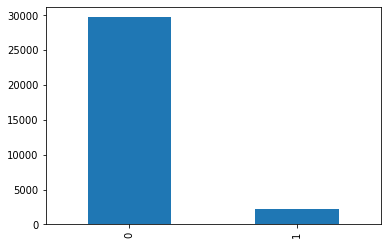

In [4]:
train_orig['label'].value_counts().plot(kind='bar')

In [5]:
test_org.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## Preprocessing the dataset

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
train=train_orig

preprocess word

In [11]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return " ".join((filtered_sentence))

In [12]:
def preprocess(line):
    line = line.lower()  #convert to lowercase
    line = re.sub(r'\d+', '', line)  #remove numbers
    line = line.translate(line.maketrans("","", string.punctuation))  #remove punctuation
#     line = line.translate(None, string.punctuation)  #remove punctuation
    line = remove_stopwords(line)
    return line
for i,line in enumerate(train.tweet):
    train.tweet[i] = preprocess(line)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
for i,line in enumerate(train.tweet):
    train.tweet[i]=preprocess(line)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train['tweet'],train['label'],test_size=0.2,stratify=train['label'])

trainp=train[train.label==1]
trainn=train[train.label==0]

In [15]:
trainn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29720 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29720 non-null  int64 
 1   label   29720 non-null  int64 
 2   tweet   29720 non-null  object
dtypes: int64(2), object(1)
memory usage: 928.8+ KB


In [16]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Balancing sheet

In [17]:
train_imbalanced=train
from sklearn.utils import resample
df_majority=train[train.label==0]
df_minority=train[train.label==1]

In [18]:
# Upsample minority class

df_miniority_unsampled=resample(df_minority,
                               replace=True,
                               n_samples=len(df_majority),
                               random_state=123)

In [19]:
df_upsampled=pd.concat([df_majority,df_miniority_unsampled])

print("Before")
print(train.label.value_counts())
print("After")
print(df_upsampled.label.value_counts())

Before
0    29720
1     2242
Name: label, dtype: int64
After
1    29720
0    29720
Name: label, dtype: int64


In [23]:
print(train.shape)
print(df_upsampled.shape)

(31962, 3)
(59440, 3)


In [25]:
df_upsampled.tail()

,id,label,tweet
30530,30531,1,homicides rose big cities year wall street jou...
21155,21156,1,user major kind people arenât talking enough...
30537,30538,1,may correct cant pay attention communist
6169,6170,1,look repug gop pay bigots
26670,26671,1,truly sad lot working class men resent offered...


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled['tweet'], df_upsampled['label'], test_size=0.5, stratify=df_upsampled['label'])

In [27]:
X_train.head()

26048          two things make life travel bubbletea lemon
16261    today going great day positive motivated user ...
5950     man comes last race declared winner putinschoi...
11415    great weekend friends pay fun great like follo...
831      rushlimbaugh incredibly obama impression via user
Name: tweet, dtype: object

## model preparations

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

In [37]:
tf_test_nolabel=vect.transform(test_org.tweet)

In [38]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

model.fit(X=tf_train,y=y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
expected=y_test
predicted=model.predict(tf_test)

In [40]:
from sklearn import metrics
print(metrics.confusion_matrix(expected,predicted))

[[13590  1270]
 [  257 14603]]


In [41]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     14860
           1       0.92      0.98      0.95     14860

    accuracy                           0.95     29720
   macro avg       0.95      0.95      0.95     29720
weighted avg       0.95      0.95      0.95     29720

